In [16]:
import os
import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
from functions2 import *
%matplotlib inline

In [26]:
Reg_Path = 'E:/Geospatial_Project/Dati/Limiti/Lim/Reg01012021/Reg01012021_WGS84.shp'
Prov_Path = 'E:/Geospatial_Project/Dati/Limiti/Lim/ProvCM01012021/ProvCM01012021_WGS84.shp'
# Reading the geodaframe

Reg_df = gpd.read_file(Reg_Path)
Prov_df = gpd.read_file(Prov_Path)

# Anomalous Regions names
Anomalous_Regions = ['Trentino-Alto Adige/Südtirol','Friuli-Venezia Giulia',"Valle d'Aosta/Vallée d'Aoste"]
#Sud_Sardinia_Agglomeration
Sud_Sardinia = ['Ogliastra','Olbia-Tempio','Medio Campidano','Carbonia-Iglesias']
# Macro_Areas 
Macro_Areas = ['Centro', 'Mezzogiorno', 'Nord']
# Italy 
Italy = ['Italia']
# Different_Names
Different_Names_BES = ['Bolzano/Bozen', 'Forlì-Cesena', 'Massa-Carrara', 'Reggio Calabria']
Deffirent_Names_ISTAT = ['Bolzano', "Forli'-Cesena", 'Massa Carrara', 'Reggio di Calabria']

# Read the BES_Statistics Dataframe
path_ = 'E:/Geospatial_Project/Nuovi_Dati2/'

In [27]:
os.chdir(path_)

In [28]:
# Get the Istat regions 
Regions = Reg_df.DEN_REG.to_list()
# Get  BES Regions
Bes_Regions = regions_BES(Regions)
# Extract the set of all Bes provinces

In [29]:
## PREPARE REG GEO DF ##
Reg_df = mod_col_geo(Reg_df)
Reg_df = order_df_regions(Reg_df, Bes_Regions)

In [30]:
#df = read_dati_bes('Ambiente-Disponibilità di verde urbano-Totale-m2 per abitante.xlsx')
df = read_dati_bes('Benessere economico-Patrimonio pro capite-Totale-euro.xlsx')

In [31]:
provinces = provinces_BES(df, Anomalous_Regions, Sud_Sardinia, Macro_Areas, Italy, Regions)

In [32]:
## PREPARE PROV GEO DF ## 
Prov_df = clean_prov_geo(Prov_df, provinces)

In [33]:
# 'PROVINCES' #
# Create the provinces df
df_prov = order_df(df, provinces)
# Obtain the full geodataframe of provinces 
df_prov = from_df_to_gdf(df_prov, Prov_df)

In [34]:
df_prov.to_crs(4326, inplace = True)
Reg_df.to_crs(4326, inplace = True)

In [36]:
df_prov2 = look_for_anomalies(df_prov, 'V_2017')

In [94]:
type(df_prov)

geopandas.geodataframe.GeoDataFrame

In [37]:
df_prov2 = df_prov2.reset_index()

In [38]:
prova_df = gpd.sjoin(Reg_df, 
                          df_prov2, how='inner', predicate='contains')

In [39]:
prova_df2 = prova_df.reset_index()

In [40]:
median_val = prova_df2['V_2017'].groupby([prova_df2['Reg']]).mean()


In [41]:
median_val

Reg
Abruzzo                         117676.450000
Basilicata                       89583.750000
Calabria                         81262.760000
Campania                         98961.020000
Emilia-Romagna                  199199.288889
Friuli-Venezia Giulia           177855.600000
Lazio                           129361.420000
Liguria                         195818.850000
Lombardia                       193662.191667
Marche                          143618.160000
Molise                          112782.150000
Piemonte                        188800.237500
Puglia                          103270.700000
Sardegna                        111587.825000
Sicilia                          95926.177778
Toscana                         160611.780000
Trentino-Alto Adige/Südtirol    207361.550000
Umbria                          132229.300000
Valle d'Aosta/Vallée d'Aoste    228252.600000
Veneto                          183365.057143
Name: V_2017, dtype: float64

In [42]:
prova_df2 = prova_df.merge(median_val, on = 'Reg')

In [43]:
prova_df2

,Shape_Leng_left,Shape_Area_left,geometry,index_right,TERRITORIO,INDICATORE,UNITA_MISURA,V_2004,V_2005,V_2006,...,V_2014,V_2015,V_2016,V_2017_x,V_2018,V_2019,NOTE,Shape_Leng_right,Shape_Area_right,V_2017_y
Reg,,,,,,,,,,,,,,,,,,,,,
Abruzzo,6.645380e+05,1.083150e+10,"MULTIPOLYGON (((14.23309 42.46541, 14.23156 42...",24,Chieti,Patrimonio pro capite,euro,NaN,NaN,NaN,...,115624.1,115234.5,113567.3,110916.6,NaN,NaN,NaN,289962.330727,2.599535e+09,117676.450000
Abruzzo,6.645380e+05,1.083150e+10,"MULTIPOLYGON (((14.23309 42.46541, 14.23156 42...",42,L'Aquila,Patrimonio pro capite,euro,NaN,NaN,NaN,...,132884.9,132243.8,129009.3,129869.8,NaN,NaN,NaN,496149.922631,5.047336e+09,117676.450000
Abruzzo,6.645380e+05,1.083150e+10,"MULTIPOLYGON (((14.23309 42.46541, 14.23156 42...",68,Pescara,Patrimonio pro capite,euro,NaN,NaN,NaN,...,119509.5,120101.6,120668.7,121273.8,NaN,NaN,NaN,231481.010597,1.230289e+09,117676.450000
Abruzzo,6.645380e+05,1.083150e+10,"MULTIPOLYGON (((14.23309 42.46541, 14.23156 42...",90,Teramo,Patrimonio pro capite,euro,NaN,NaN,NaN,...,107744.5,108990.6,108744.0,108645.6,NaN,NaN,NaN,236586.537399,1.954337e+09,117676.450000
Basilicata,6.757507e+05,1.007311e+10,"MULTIPOLYGON (((15.71688 39.96766, 15.71698 39...",53,Matera,Patrimonio pro capite,euro,NaN,NaN,NaN,...,86258.6,87298.2,88309.8,89184.1,NaN,NaN,NaN,401711.608861,3.478836e+09,89583.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Veneto,1.140433e+06,1.834537e+10,"POLYGON ((12.50603 46.67803, 12.50614 46.67754...",102,Verona,Patrimonio pro capite,euro,NaN,NaN,NaN,...,198065.7,197427.0,197952.9,200654.2,NaN,NaN,NaN,368174.756441,3.096280e+09,183365.057143
Veneto,1.140433e+06,1.834537e+10,"POLYGON ((12.50603 46.67803, 12.50614 46.67754...",99,Venezia,Patrimonio pro capite,euro,NaN,NaN,NaN,...,182954.8,183503.8,182620.5,184793.6,NaN,NaN,NaN,500001.700363,2.472882e+09,183365.057143
Veneto,1.140433e+06,1.834537e+10,"POLYGON ((12.50603 46.67803, 12.50614 46.67754...",104,Vicenza,Patrimonio pro capite,euro,NaN,NaN,NaN,...,171812.8,174398.5,173782.8,175154.3,NaN,NaN,NaN,358300.807241,2.722449e+09,183365.057143


<AxesSubplot:>

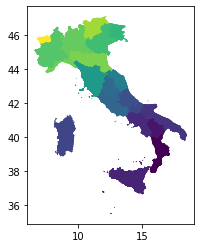

In [44]:
prova_df2.plot(column = 'V_2017_y')

<AxesSubplot:>

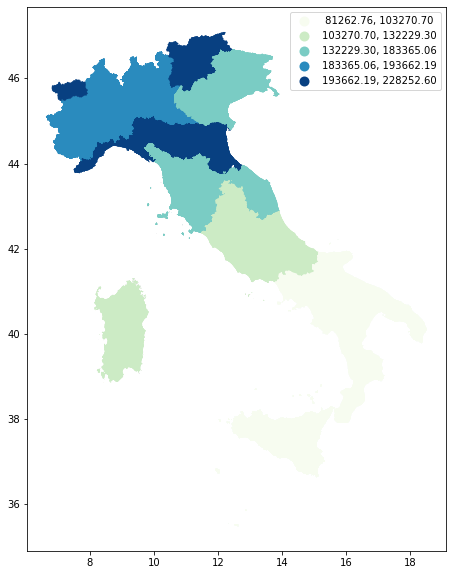

In [46]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
prova_df2.plot(column='V_2017_y', scheme='Quantiles', k=5, cmap='GnBu', legend=True, ax=ax)

In [47]:
df = prova_df2
wq =  lps.weights.Queen.from_dataframe(df)
wq.transform = 'r'

In [49]:
y = df['V_2017_y']
ylag = lps.weights.lag_spatial(wq, y)

In [50]:
ylag

array([129566.10333333, 129566.10333333, 129566.10333333, 129566.10333333,
        94725.10882353,  94725.10882353,  84036.42333333,  84036.42333333,
        84036.42333333,  84036.42333333,  84036.42333333, 108789.85157895,
       108789.85157895, 108789.85157895, 108789.85157895, 108789.85157895,
       181832.99835391, 181832.99835391, 181832.99835391, 181832.99835391,
       181832.99835391, 181832.99835391, 181832.99835391, 181832.99835391,
       181832.99835391, 181712.22      , 181712.22      , 181712.22      ,
       181712.22      , 134287.1275    , 134287.1275    , 134287.1275    ,
       134287.1275    , 134287.1275    , 183225.66166667, 183225.66166667,
       183225.66166667, 183225.66166667, 192750.21914414, 192750.21914414,
       192750.21914414, 192750.21914414, 192750.21914414, 192750.21914414,
       192750.21914414, 192750.21914414, 192750.21914414, 192750.21914414,
       192750.21914414, 192750.21914414, 157510.45705882, 157510.45705882,
       157510.45705882, 1

In [51]:
import mapclassify as mc
ylagq5 = mc.Quantiles(ylag, k=5)

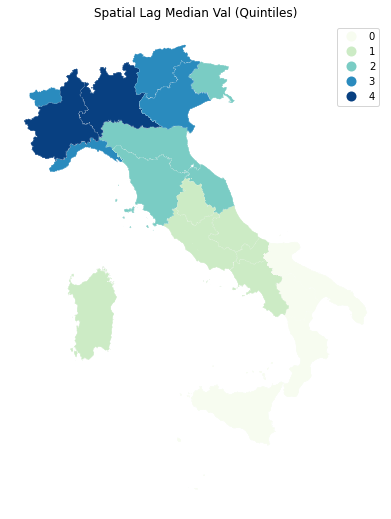

In [52]:
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=ylagq5.yb).plot(column='cl', categorical=True, \
        k=5, cmap='GnBu', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Spatial Lag Median Val (Quintiles)")

plt.show()

In [53]:
df.head(1)

,Shape_Leng_left,Shape_Area_left,geometry,index_right,TERRITORIO,INDICATORE,UNITA_MISURA,V_2004,V_2005,V_2006,...,V_2014,V_2015,V_2016,V_2017_x,V_2018,V_2019,NOTE,Shape_Leng_right,Shape_Area_right,V_2017_y
Reg,,,,,,,,,,,,,,,,,,,,,
Abruzzo,664538.009079,1.083150e+10,"MULTIPOLYGON (((14.23309 42.46541, 14.23156 42...",24,Chieti,Patrimonio pro capite,euro,NaN,NaN,NaN,...,115624.1,115234.5,113567.3,110916.6,NaN,NaN,NaN,289962.330727,2.599535e+09,117676.45


In [54]:
len(df)

106

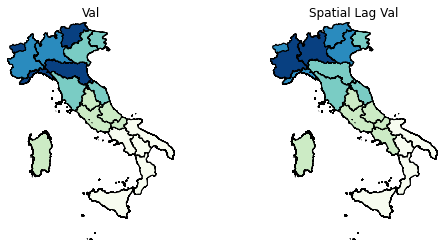

In [56]:
df['lag_median_val'] = ylag
f,ax = plt.subplots(1,2,figsize=(2.16*4,4))
df.plot(column='V_2017_y', ax=ax[0], edgecolor='k',
        scheme="quantiles",  k=5, cmap='GnBu')
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("Val")
df.plot(column='lag_median_val', ax=ax[1], edgecolor='k',
        scheme='quantiles', cmap='GnBu', k=5)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Spatial Lag Val")
ax[0].axis('off')
ax[1].axis('off')
plt.show()

In [57]:
y.median()

160611.78

In [58]:
yb = y > y.median()
sum(yb)

47

In [59]:
yb = y > y.median()
labels = ["0 Low", "1 High"]
yb = [labels[i] for i in 1*yb] 
df['yb'] = yb

<AxesSubplot:>

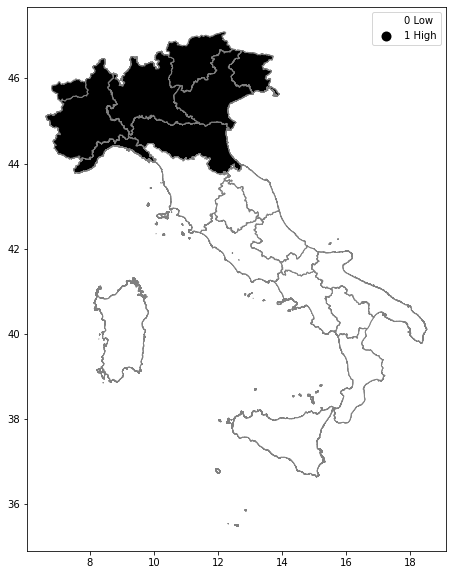

In [60]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='yb', cmap='binary', edgecolor='grey', legend=True, ax=ax)

In [61]:
import esda 
yb = 1 * (y > y.median()) # convert back to binary
wq =  lps.weights.Queen.from_dataframe(df)
wq.transform = 'b'
np.random.seed(12345)
jc = esda.join_counts.Join_Counts(yb, wq)

In [62]:
jc.bb

729.0

In [63]:
jc.ww

483.0

In [64]:
jc.bw

175.0

In [65]:
jc.bb + jc.ww + jc.bw

1387.0

In [66]:
wq.s0 / 2

1387.0

In [67]:
wq.s0 / 2

1387.0

In [68]:
jc.mean_bb

270.97297297297297

Text(0.5, 0, 'BB Counts')

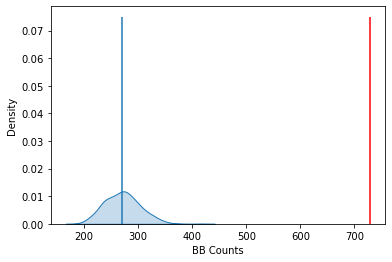

In [69]:
import seaborn as sbn
sbn.kdeplot(jc.sim_bb, shade=True)
plt.vlines(jc.bb, 0, 0.075, color='r')
plt.vlines(jc.mean_bb, 0,0.075)
plt.xlabel('BB Counts')

In [70]:
jc.p_sim_bb 

0.001

Not significant!!!
Check whether this value is below 0.05 or 0.01


In [71]:
wq.transform = 'r'

In [73]:
y = df['V_2017_y']

In [74]:
np.random.seed(12345)
mi = esda.moran.Moran(y, wq)
mi.I

0.9107428029210805

Text(0.5, 0, "Moran's I")

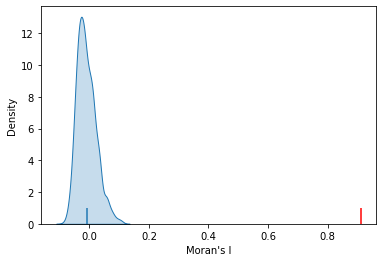

In [75]:
import seaborn as sbn
sbn.kdeplot(mi.sim, shade=True)
plt.vlines(mi.I, 0, 1, color='r')
plt.vlines(mi.EI, 0,1)
plt.xlabel("Moran's I")

In [76]:
mi.p_sim

0.001

In [77]:
np.random.seed(12345)
import esda

In [79]:
wq.transform = 'r'
lag_price = lps.weights.lag_spatial(wq, df['V_2017_y'])

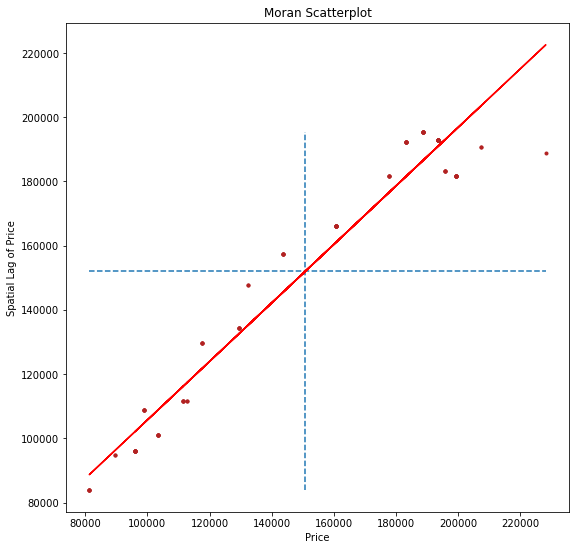

In [80]:
price = df['V_2017_y']
b, a = np.polyfit(price, lag_price, 1)
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(price, lag_price, '.', color='firebrick')

 # dashed vert at mean of the price
plt.vlines(price.mean(), lag_price.min(), lag_price.max(), linestyle='--')
 # dashed horizontal at mean of lagged price 
plt.hlines(lag_price.mean(), price.min(), price.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(price, a + b*price, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Price')
plt.xlabel('Price')
plt.show()

In [81]:
li = esda.moran.Moran_Local(y, wq)

In [82]:
sig = li.p_sim < 0.05
hotspot = sig * li.q==1
coldspot = sig * li.q==3
doughnut = sig * li.q==2
diamond = sig * li.q==4

In [83]:
spots = ['n.sig.', 'hot spot']
labels = [spots[i] for i in hotspot*1]

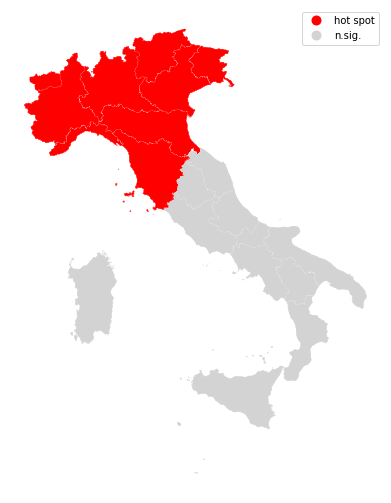

In [84]:
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['red', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [85]:
spots = ['n.sig.', 'cold spot']
labels = [spots[i] for i in coldspot*1]

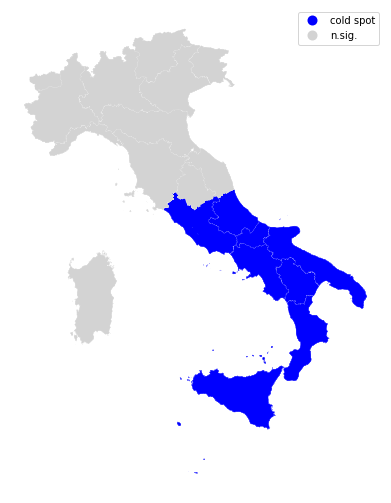

In [86]:
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['blue', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [87]:
spots = ['n.sig.', 'doughnut']
labels = [spots[i] for i in doughnut*1]

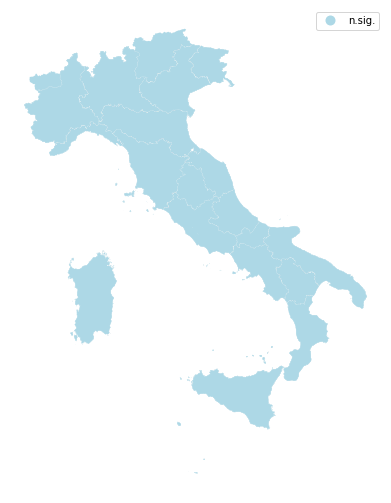

In [88]:
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['lightblue', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [89]:
spots = ['n.sig.', 'diamond']
labels = [spots[i] for i in diamond*1]

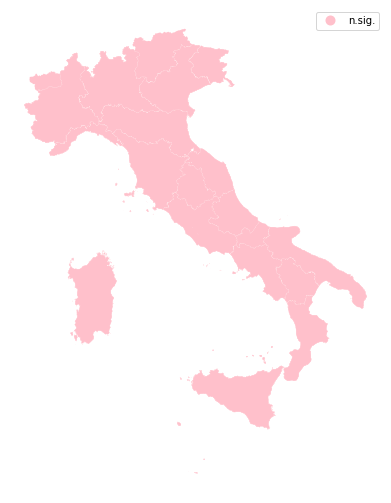

In [90]:
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['pink', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [91]:
sig = 1 * (li.p_sim < 0.05)
hotspot = 1 * (sig * li.q==1)
coldspot = 3 * (sig * li.q==3)
doughnut = 2 * (sig * li.q==2)
diamond = 4 * (sig * li.q==4)
spots = hotspot + coldspot + doughnut + diamond
spots

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [92]:
spot_labels = [ '0 ns', '1 hot spot', '2 doughnut', '3 cold spot', '4 diamond']
labels = [spot_labels[i] for i in spots]

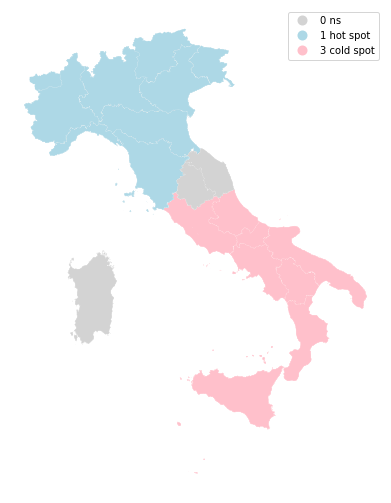

In [93]:
from matplotlib import colors
hmap = colors.ListedColormap([ 'lightgrey', 'red', 'lightblue', 'blue', 'pink'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()